In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [2]:
df = df.drop(columns=['url','region','region_url','image_url','county','state'],axis=1)
df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,lat,long,posting_date
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  VIN           265838 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  description   426810 non-null  object 
 16  lat           420331 non-null  float64
 17  long          420331 non-null  float64
 18  post

In [4]:
df = df.drop(columns=['lat','long'],axis=1)
df.tail()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,posting_date
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,2021-04-04T03:21:31-0600
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,2021-04-04T03:21:29-0600
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,2021-04-04T03:21:17-0600
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,2021-04-04T03:21:11-0600
426879,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,Carvana is the safer way to buy a car During t...,2021-04-04T03:21:07-0600


In [5]:
df['posting_date']=pd.to_datetime(df['posting_date'],utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   price         426880 non-null  int64              
 1   year          425675 non-null  float64            
 2   manufacturer  409234 non-null  object             
 3   model         421603 non-null  object             
 4   condition     252776 non-null  object             
 5   cylinders     249202 non-null  object             
 6   fuel          423867 non-null  object             
 7   odometer      422480 non-null  float64            
 8   title_status  418638 non-null  object             
 9   transmission  424324 non-null  object             
 10  VIN           265838 non-null  object             
 11  drive         296313 non-null  object             
 12  size          120519 non-null  object             
 13  type          334022 non-null  object       

In [6]:
df = df.drop(columns=['VIN','description'],axis=1)

In [7]:
df.tail()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,posting_date
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,2021-04-04 09:21:31+00:00
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,2021-04-04 09:21:29+00:00
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,2021-04-04 09:21:17+00:00
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,2021-04-04 09:21:11+00:00
426879,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,NaN,coupe,NaN,2021-04-04 09:21:07+00:00


In [8]:
df.isnull().sum()

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
posting_date        68
dtype: int64

In [9]:
df['year'] = df['year'].fillna(2017.0)
df['manufacturer'] = df['manufacturer'].fillna('ford')
df['model'] = df['model'].fillna('f-150')
df['condition'] = df['condition'].fillna('good')
df['cylinders'] = df['cylinders'].fillna('6 cylinders')
df['fuel'] = df['fuel'].fillna('gas')
df['odometer'] = df['odometer'].fillna(100000.0)
df['title_status'] = df['title_status'].fillna('clean')
df['transmission'] = df['transmission'].fillna('automatic')
df['drive'] = df['drive'].fillna('4wd')
df['size'] = df['size'].fillna('full-size')
df['type'] = df['type'].fillna('sedan')
df['paint_color'] = df['paint_color'].fillna('white')
df['posting_date'] = df['posting_date'].fillna('2021-04-24 02:13:05+00:00')
df.isnull().sum()


price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
posting_date    0
dtype: int64

In [10]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,posting_date
0,6000,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,2021-04-24 02:13:05+00:00
1,11900,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,2021-04-24 02:13:05+00:00
2,21000,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,2021-04-24 02:13:05+00:00
3,1500,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,2021-04-24 02:13:05+00:00
4,4900,2017.0,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,white,2021-04-24 02:13:05+00:00


In [11]:
df['manufacturer'] =df['manufacturer'].map({'ford':0, 'gmc':1, 'chevrolet':2, 'toyota':3, 'jeep':4, 'nissan':5, 'ram':6,
       'mazda':7, 'cadillac':8, 'honda':9, 'dodge':10, 'lexus':11, 'jaguar':12, 'buick':13,
       'chrysler':14, 'volvo':15, 'audi':16, 'infiniti':17, 'lincoln':18, 'alfa-romeo':19,
       'subaru':20, 'acura':21, 'hyundai':22, 'mercedes-benz':23, 'bmw':24, 'mitsubishi':25,
       'volkswagen':26, 'porsche':27, 'kia':28, 'rover':29, 'ferrari':30, 'mini':31,
       'pontiac':32, 'fiat':33, 'tesla':34, 'saturn':35, 'mercury':36, 'harley-davidson':37,
       'datsun':38, 'aston-martin':39, 'land rover':40, 'morgan':41})


df['cylinders'] = df['cylinders'].map({'6 cylinders':0, '8 cylinders':1, '4 cylinders':2, '5 cylinders':3,
       'other':4, '3 cylinders':5, '10 cylinders':6, '12 cylinders':7})


df['fuel'] = df['fuel'].map({'gas':0,'diesel':1,'hybrid':2,'electric':3,'other':4})

df['condition']=df['condition'].map({'good':4, 'excellent':3, 'fair':5, 'like new':2, 'new':1, 'salvage':0})

df['title_status']=df['title_status'].map({'clean':1, 'rebuilt':2, 'lien':3, 'salvage':4, 'missing':5, 'parts only':0})

df['transmission'] = df['transmission'].map({'automatic':1,'manual':0,'other':2})

df['drive'] = df['drive'].map({'4wd':1,'rwd':2,'fwd':0})

df['size'] = df['size'].map({'full-size':1, 'mid-size':2, 'compact':3, 'sub-compact':0})

df['type'] = df['type'].map({'sedan':1, 'pickup':2, 'truck':3, 'other':0, 'coupe':4, 'SUV':5, 'hatchback':6,
       'mini-van':7, 'offroad':8, 'bus':9, 'van':10, 'convertible':11, 'wagon':12})

df['paint_color'] = df['paint_color'].map({'white':1, 'blue':2, 'red':3, 'black':4, 'silver':5, 'grey':6, 'brown':7,
       'yellow':8, 'orange':9, 'green':10, 'custom':0, 'purple':11})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   price         426880 non-null  int64              
 1   year          426880 non-null  float64            
 2   manufacturer  426880 non-null  int64              
 3   model         426880 non-null  object             
 4   condition     426880 non-null  int64              
 5   cylinders     426880 non-null  int64              
 6   fuel          426880 non-null  int64              
 7   odometer      426880 non-null  float64            
 8   title_status  426880 non-null  int64              
 9   transmission  426880 non-null  int64              
 10  drive         426880 non-null  int64              
 11  size          426880 non-null  int64              
 12  type          426880 non-null  int64              
 13  paint_color   426880 non-null  int64        

In [12]:
df = df.drop(columns=['model'],axis=1)
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,posting_date
0,6000,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
1,11900,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
2,21000,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
3,1500,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
4,4900,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00


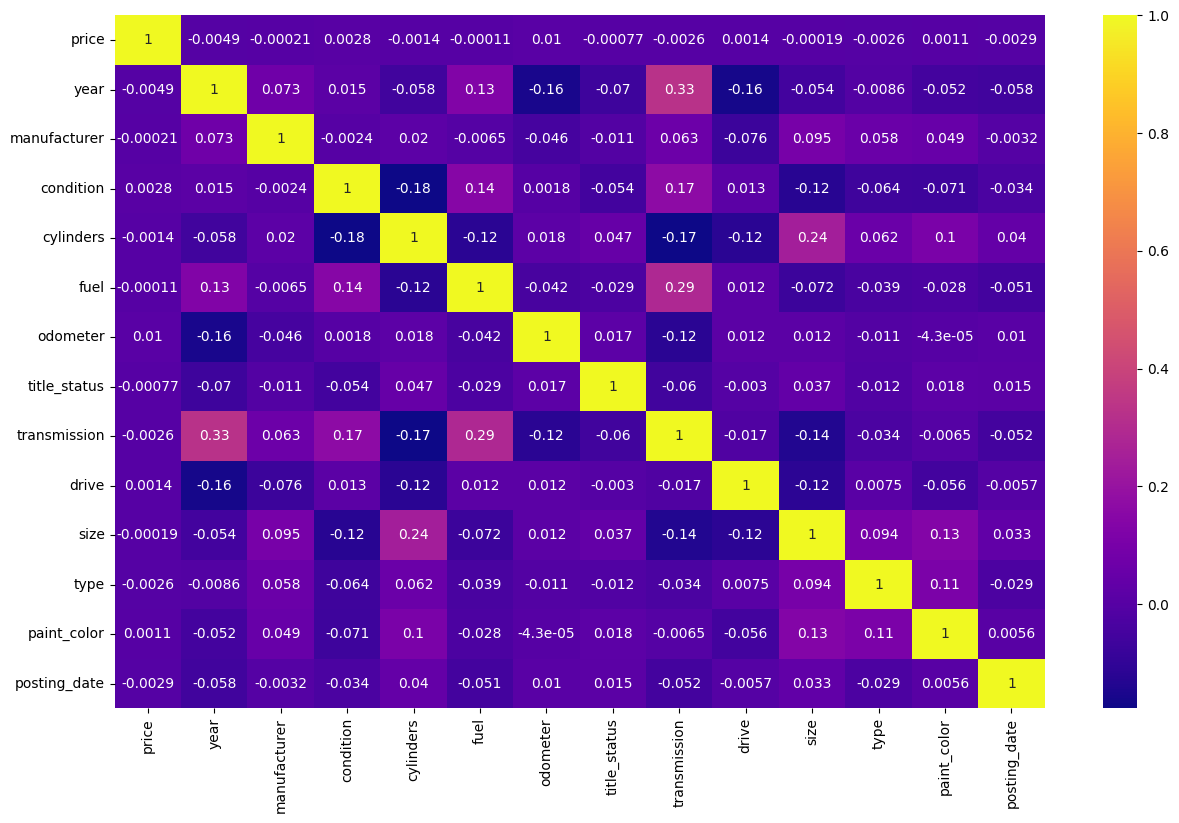

In [13]:
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [14]:
df.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,posting_date
0,6000,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
1,11900,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
2,21000,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
3,1500,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
4,4900,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
5,1600,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
6,1000,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
7,15995,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
8,5000,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00
9,3000,2017.0,0,4,0,0,100000.0,1,1,1,1,1,1,2021-04-24 02:13:05+00:00


In [15]:
x = df.drop(columns=['price','posting_date'],axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)


LinearRegression()

In [16]:
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)


Lasso()

In [18]:
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)


AdaBoostRegressor()

In [19]:
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)


KNeighborsRegressor()

In [21]:
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)

In [22]:
from sklearn.metrics import r2_score
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)

In [23]:
print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)

LINEAR REG  -0.0001099883148130143
RIDGE  -0.00010998781688287274
LASSO  -0.00010998645294835185


In [24]:
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)

GB -0.019724570594281454
ADABOOST 0.15687684187173245
XGB 0.09418775420342473
KNN 0.0740205288691207
